In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings("ignore")   

---

In [2]:
# Загрузка данных
def load_data():
    customers = pd.read_csv("./clean_data/customers.csv")
    geolocation = pd.read_csv("./clean_data/geolocation.csv")
    order_pay = pd.read_csv("./clean_data/order_payments.csv")
    reviews = pd.read_csv("./clean_data/order_reviews.csv")
    orders = pd.read_csv("./clean_data/orders.csv")
    item = pd.read_csv("./clean_data/orders_items.csv")
    category_name = pd.read_csv(
        "./clean_data/product_category_name_translation.csv")
    products = pd.read_csv("./clean_data/products.csv")
    sellers = pd.read_csv("./clean_data/sellers.csv")
    return customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers


# Объединение данных
def merge_data(orders, item, order_pay, reviews, products, customers, sellers, category_name):
    df = orders.merge(item, on='order_id', how='left')
    df = df.merge(order_pay, on='order_id', how='outer', validate='m:m')
    df = df.merge(reviews, on='order_id', how='outer')
    df = df.merge(products, on='product_id', how='outer')
    df = df.merge(customers, on='customer_id', how='outer')
    df = df.merge(sellers, on='seller_id', how='outer')
    df = df.merge(category_name, on="product_category_name", how="left")
    return df


# Очистка данных: удаление строк без customer_unique_id
def filter_customers(df):
    return df[~df["customer_unique_id"].isna()]


# Главная функция пайплайна
def main_pipeline():
    # Шаг 1: Загрузка данных
    customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers = load_data()

    # Шаг 2: Объединение данных
    df = merge_data(orders, item, order_pay, reviews, products,
                    customers, sellers, category_name)

    # Шаг 3: Фильтрация данных
    df = filter_customers(df)

    final_data = df

    return final_data

In [3]:
data = main_pipeline()

In [4]:
# Убираем строки с отсутствующими customer_id или order_purchase_timestamp
data = data.dropna()

In [5]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502.0,umuarama,PR,9080.0,santo andre,SP,small_appliances
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490.0,entre rios de minas,MG,9080.0,santo andre,SP,small_appliances
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600.0,paracatu,MG,9080.0,santo andre,SP,small_appliances
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools


In [7]:
# Приводим столбцы к нужному типу данных
data['order_purchase_timestamp'] = pd.to_datetime(
    data['order_purchase_timestamp'])

In [ ]:
data_time = data[["customer_unique_id", "order_purchase_timestamp"]]

In [9]:
pd.read_csv("./labels/rfm_abc_xyz.csv")

,customer_unique_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,RFM_Weighted,Churn_Risk,cumulative_value,cumulative_percent,abc_class,std_dev,x_category,segment,segment_description
0,0a0a92112bd4c708ca5fde585afaa872,334,8,109312.64,2,0,3,5,1.6,Низкий риск,1.093126e+05,0.562911,A,0.000000,X,A_X,"Высокоприбыльные клиенты, низкая вариативность."
1,c402f431464c72e27330a67f7b94d4fb,188,20,44048.00,1,0,3,4,1.1,Средний риск,1.533606e+05,0.789739,A,NaN,Single Purchase,A_Single Purchase,"Клиенты с одной покупкой, высокий денежный объем."
2,4007669dec559734d6f53e029e360987,279,6,36489.24,2,0,3,5,1.6,Низкий риск,1.898499e+05,0.977642,A,70.355904,Z,A_Z,Высокоприбыльные клиенты с большой вариативнос...
3,ef8d54b3797ea4db1d63f0ced6a906e9,133,10,30186.00,1,0,3,4,1.1,Средний риск,2.200359e+05,1.133087,A,17.741309,Y,A_Y,Высокоприбыльные клиенты с разумной вариативно...
4,763c8b1c9c68a0229c42c9fc6f662b93,46,4,29099.52,0,0,3,3,0.6,Средний риск,2.491354e+05,1.282936,A,NaN,Single Purchase,A_Single Purchase,"Клиенты с одной покупкой, высокий денежный объем."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91460,2878e5b88167faab17d4fb83a986d38b,304,1,11.63,2,0,0,2,1.0,Средний риск,1.941911e+07,99.999783,C,0.000000,X,C_X,"Клиенты с низким объемом, низкая вариативность."
91461,6f5b9d1cdccc4d28f0483a612edecacf,361,1,11.63,3,0,0,3,1.5,Средний риск,1.941913e+07,99.999843,C,1.628128,Y,C_Y,"Клиенты с низким объемом и частотой, но с вари..."
91462,b33336f46234b24a613ad9064d13106d,69,1,10.89,0,0,0,0,0.0,Высокий риск,1.941914e+07,99.999899,C,17.281690,Y,C_Y,"Клиенты с низким объемом и частотой, но с вари..."
91463,bd06ce0e06ad77a7f681f1a4960a3cc6,350,1,10.07,3,0,0,3,1.5,Средний риск,1.941915e+07,99.999951,C,NaN,Single Purchase,C_Single Purchase,"Клиенты с одной покупкой, низкий денежный объем."


In [17]:
data_labels = pd.read_csv("./labels/rfm_abc_xyz.csv")
data_labels_time = data_labels[["customer_unique_id", "segment_description", "Churn_Risk"]]

In [18]:
data_labels_time

,customer_unique_id,segment_description,Churn_Risk
0,0a0a92112bd4c708ca5fde585afaa872,"Высокоприбыльные клиенты, низкая вариативность.",Низкий риск
1,c402f431464c72e27330a67f7b94d4fb,"Клиенты с одной покупкой, высокий денежный объем.",Средний риск
2,4007669dec559734d6f53e029e360987,Высокоприбыльные клиенты с большой вариативнос...,Низкий риск
3,ef8d54b3797ea4db1d63f0ced6a906e9,Высокоприбыльные клиенты с разумной вариативно...,Средний риск
4,763c8b1c9c68a0229c42c9fc6f662b93,"Клиенты с одной покупкой, высокий денежный объем.",Средний риск
...,...,...,...
91460,2878e5b88167faab17d4fb83a986d38b,"Клиенты с низким объемом, низкая вариативность.",Средний риск
91461,6f5b9d1cdccc4d28f0483a612edecacf,"Клиенты с низким объемом и частотой, но с вари...",Средний риск
91462,b33336f46234b24a613ad9064d13106d,"Клиенты с низким объемом и частотой, но с вари...",Высокий риск
91463,bd06ce0e06ad77a7f681f1a4960a3cc6,"Клиенты с одной покупкой, низкий денежный объем.",Средний риск


In [29]:
worf_data = data_time.merge(
    data_labels_time, on="customer_unique_id", how="left")

worf_data.head()

,customer_unique_id,order_purchase_timestamp,segment_description,Churn_Risk
0,3c7e305796add66698959fc7ad176f6b,2017-09-26 22:17:05,"Клиенты с одной покупкой, высокий денежный объем.",Низкий риск
1,9de5797cddb92598755a0f76383ddbbb,2017-10-18 08:16:34,"Клиенты с одной покупкой, высокий денежный объем.",Низкий риск
2,9915eb9f74b6c11aaf04833f65b00e93,2017-10-12 13:33:22,"Клиенты с одной покупкой, высокий денежный объем.",Низкий риск
3,dce323533e45e74d215e0fe7fb114118,2017-09-03 08:06:30,Высокоприбыльные клиенты с большой вариативнос...,Низкий риск
4,dce323533e45e74d215e0fe7fb114118,2017-09-03 08:06:30,Высокоприбыльные клиенты с большой вариативнос...,Низкий риск


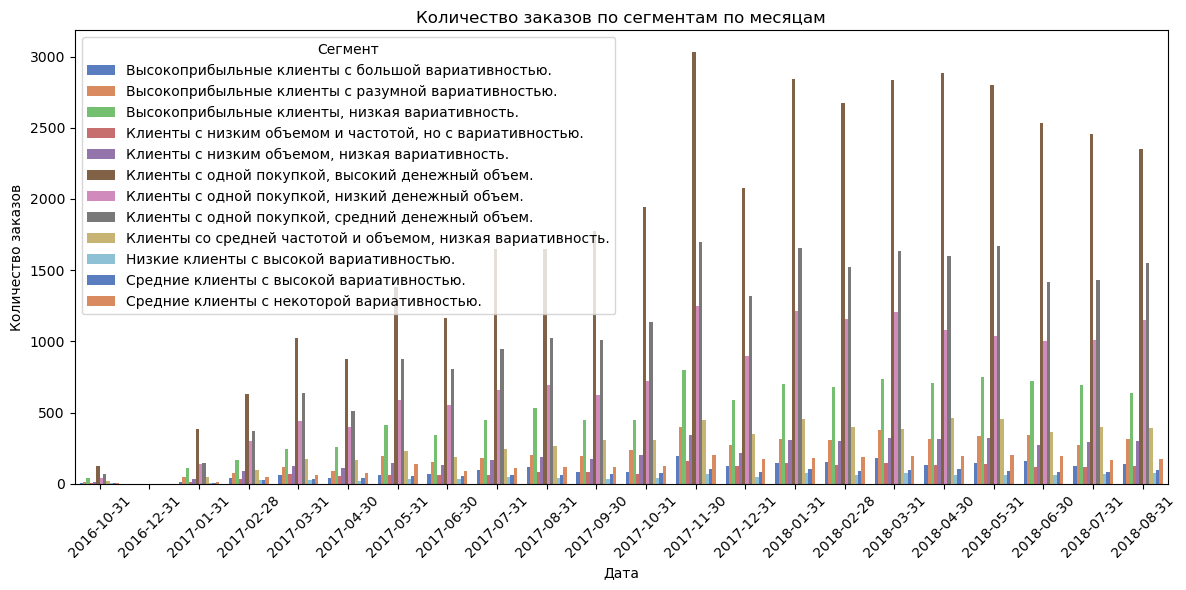

In [ ]:
# Приводим столбцы к нужному типу данных
data['order_purchase_timestamp'] = pd.to_datetime(
    data['order_purchase_timestamp'])

data_time = data[["customer_unique_id", "order_purchase_timestamp"]]

data_labels = pd.read_csv("./labels/rfm_abc_xyz.csv")
data_labels_time = data_labels[[
    "customer_unique_id", "segment_description", "Churn_Risk"]]

worf_data = data_time.merge(
    data_labels_time, on="customer_unique_id", how="left")

# Преобразование столбца даты в datetime формат
worf_data['order_purchase_timestamp'] = pd.to_datetime(
    worf_data['order_purchase_timestamp'])
# Группировка по времени и сегментам
worf_data.set_index('order_purchase_timestamp', inplace=True)

grouped_1 = worf_data.groupby(
    [pd.Grouper(freq='M'), 'segment_description']).size().unstack(fill_value=0)

# Преобразуем обратно в длинный формат
grouped_1 = grouped_1.reset_index()
grouped_melted = pd.melt(grouped_1, id_vars='order_purchase_timestamp',
                         var_name='segment_description', value_name='count')

# Построение графика с использованием Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_melted, x='order_purchase_timestamp',
            y='count', hue='segment_description', palette='muted')
plt.title('Количество заказов по сегментам по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.legend(title='Сегмент')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

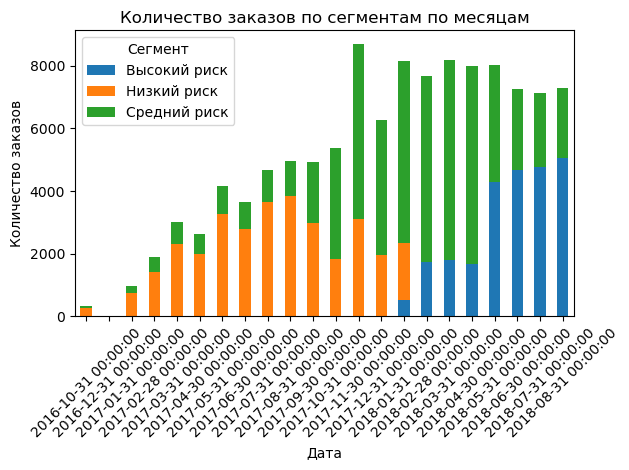

In [35]:
grouped_2 = worf_data.groupby(
    [pd.Grouper(freq='M'), 'Churn_Risk']).size().unstack(fill_value=0)


# Построение графика
plt.figure(figsize=(12, 6))
grouped_2.plot(kind='bar', stacked=True)
plt.title('Количество заказов по сегментам по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.legend(title='Сегмент')
plt.tight_layout()
plt.show()